In [24]:
import os 
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:
train_dir = "train"
test_dir = "test"
validation_dir = "validation"

In [10]:
IMAGE_HEIGHT=224
IMAGE_WEIGHT=224
BATCH_SIZE=32
EPOCHS=10

In [11]:
train_data_gen = ImageDataGenerator(rescale=1./255)
test_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

train_gen = train_data_gen.flow_from_directory(
    train_dir,
    batch_size = BATCH_SIZE,
    target_size=(IMAGE_HEIGHT,IMAGE_WEIGHT),
    class_mode="categorical"   
)

test_gen = test_data_gen.flow_from_directory(
    test_dir,
    batch_size=BATCH_SIZE,
    target_size=(IMAGE_HEIGHT,IMAGE_WEIGHT),
    class_mode="categorical",
    shuffle=False
)

validation_gen = validation_data_gen.flow_from_directory(
    validation_dir,
    batch_size=BATCH_SIZE,
    target_size=(IMAGE_HEIGHT,IMAGE_WEIGHT),
    class_mode="categorical",
)

Found 1260 images belonging to 3 classes.
Found 360 images belonging to 3 classes.
Found 180 images belonging to 3 classes.


In [12]:
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape = (IMAGE_HEIGHT,IMAGE_WEIGHT,3)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3), activation="relu"),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3), activation="relu"),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(train_gen.num_classes, activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

d:\Reyad's Projects\Test Project\Snake Gourd Classification\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(train_gen,epochs=EPOCHS,validation_data=validation_gen)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 306ms/step - accuracy: 0.4762 - loss: 1.2496 - val_accuracy: 0.5611 - val_loss: 0.8961
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 300ms/step - accuracy: 0.6587 - loss: 0.7851 - val_accuracy: 0.6667 - val_loss: 0.6846
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 297ms/step - accuracy: 0.7206 - loss: 0.6499 - val_accuracy: 0.8000 - val_loss: 0.4817
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 295ms/step - accuracy: 0.7976 - loss: 0.4935 - val_accuracy: 0.8333 - val_loss: 0.3634
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 297ms/step - accuracy: 0.8222 - loss: 0.4278 - val_accuracy: 0.8944 - val_loss: 0.2909
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 293ms/step - accuracy: 0.8722 - loss: 0.3229 - val_accuracy: 0.8444 - val_loss: 0.3731
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 293ms/step - accuracy: 0.8960 - loss: 0.2848 - val_accuracy: 0.8444 - val_loss: 0.3649
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 295ms/step - accuracy: 0.9151 - loss: 0.2492 - val_accu

In [14]:
test_loss, test_acc = model.evaluate(test_gen)

d:\Reyad's Projects\Test Project\Snake Gourd Classification\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 334ms/step - accuracy: 0.8750 - loss: 0.3997


In [15]:
true_labels=test_gen.classes
pred_prob=model.predict(test_gen)
pred_labels=np.argmax(pred_prob,axis=1)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step


In [20]:
test_gen.class_indices

{'Anthracnose': 0, 'Healthy': 1, 'Yellow': 2}

In [22]:
class_names = ['Anthracnose', 'Healthy', 'Yellow']

In [23]:
print("\nClassifcation Result \n")
print(classification_report(true_labels, pred_labels, target_names=class_names))


Classifcation Result 

              precision    recall  f1-score   support

 Anthracnose       0.97      0.83      0.90       120
     Healthy       0.92      0.88      0.90       120
      Yellow       0.77      0.91      0.83       120

    accuracy                           0.88       360
   macro avg       0.89      0.88      0.88       360
weighted avg       0.89      0.88      0.88       360



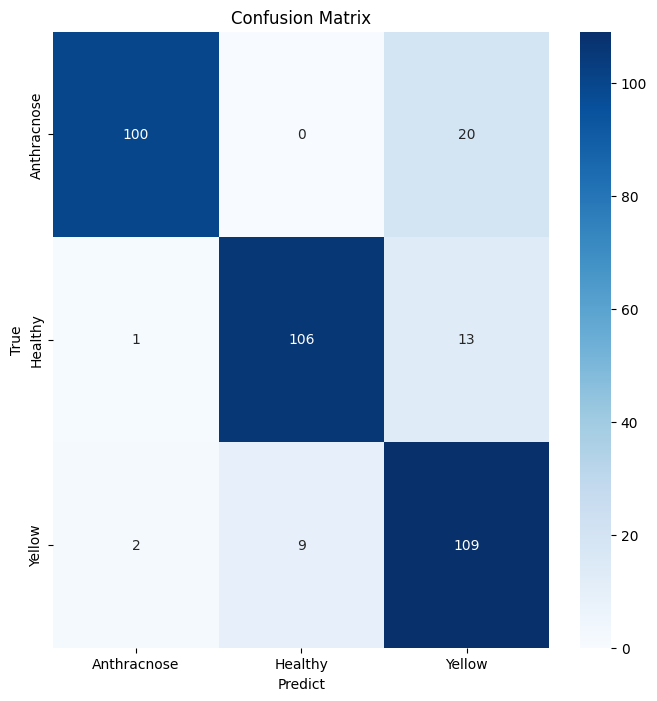

In [25]:
cm = confusion_matrix(true_labels, pred_labels)

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predict")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()